In [2]:
# Import Python libraries that will be used in data processing
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import warnings
import seaborn as sns
from datetime import date, timedelta

warnings.filterwarnings("ignore")

sns.set_palette("muted")

In [3]:
# Establish a connection to SQLite database
con = sqlite3.connect("olist.db")
cur = con.cursor()

In [4]:
# Execute the SQL query
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


In [5]:
# Convert to pandas dataframes
dataset_products = pd.read_sql("SELECT * FROM olist_products_dataset", con)
dataset_order_customer = pd.read_sql("SELECT * FROM olist_order_customer_dataset", con)
dataset_order = pd.read_sql("SELECT * FROM olist_order_dataset", con)
dataset_order_reviews = pd.read_sql("SELECT * FROM olist_order_reviews_dataset", con)
dataset_order_payments = pd.read_sql("SELECT * FROM olist_order_payments_dataset", con)
dataset_order_items = pd.read_sql("SELECT * FROM olist_order_items_dataset", con)
dataset_sellers = pd.read_sql("SELECT * FROM olist_sellers_dataset", con)
dataset_geolocation = pd.read_sql("SELECT * FROM olist_geolocation_dataset", con)
dataset_translations = pd.read_sql("SELECT * FROM product_category_name_translation", con)

In [6]:
# Merge multiple datasets into a single table
merged_data = dataset_products.merge(dataset_translations, on='product_category_name', how='inner') 
merged_data = merged_data.merge(dataset_order_items, on='product_id', how='outer')
merged_data = merged_data.merge(dataset_order, on='order_id', how='outer')
merged_data = merged_data.merge(dataset_order_customer, on='customer_id', how='outer')
merged_data = merged_data.merge(dataset_sellers, on='seller_id', how='outer')
merged_data = merged_data.merge(dataset_order_payments, on='order_id', how='outer')
merged_data = merged_data.merge(dataset_order_reviews, on='order_id', how='outer')

In [7]:
merged_data.head()

,index_x,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,payment_type,payment_installments,payment_value,index_y,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0.0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,...,debit_card,1.0,18.30,25464.0,d71da8fd8c6e3adef26be965f065b8a1,5.0,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02
1,4540.0,a035b83b3628decee6e3823924e0c10f,perfumaria,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,...,credit_card,10.0,289.45,92111.0,0f0f85749cb82321d902e390a9c33694,4.0,None,None,2018-07-11 00:00:00,2018-07-15 21:32:04
2,11970.0,091107484dd7172f5dcfed173e4a960e,perfumaria,50.0,260.0,2.0,183.0,16.0,8.0,13.0,...,credit_card,2.0,57.75,56513.0,39489f8518181b82cb86ce264e1ccc55,5.0,Agora sim,Recebido o pedido finalmente produto ótimo,2018-04-26 00:00:00,2018-04-30 21:15:06
3,31443.0,e8b61f78db501ea0ca45677d1ca27de2,brinquedos,49.0,120.0,1.0,400.0,50.0,10.0,25.0,...,credit_card,2.0,57.75,56513.0,39489f8518181b82cb86ce264e1ccc55,5.0,Agora sim,Recebido o pedido finalmente produto ótimo,2018-04-26 00:00:00,2018-04-30 21:15:06
4,14590.0,ccac9976bafbf7e587bd2c29302e2314,perfumaria,53.0,2235.0,3.0,1500.0,20.0,25.0,20.0,...,credit_card,8.0,286.45,33656.0,36b616f738d1f617cc12aeb2c01705f3,3.0,None,None,2018-08-07 00:00:00,2018-08-07 22:56:38


In [8]:
merged_data.shape

(119143, 48)

In [9]:
# Drop unused columns in dataset

drop_columns=(['product_photos_qty','index_y','index_x','product_name_lenght','product_description_lenght',
              'review_comment_title','review_comment_message','product_photos_qty','product_weight_g',
              'product_length_cm','product_length_cm','product_width_cm','product_height_cm',
              'freight_value','customer_zip_code_prefix','seller_zip_code_prefix','seller_city','seller_state',
              'review_answer_timestamp','review_creation_date'
             ])
filtered_data = merged_data.drop(columns = drop_columns)
filtered_data.shape

(119143, 24)

In [10]:
filtered_data.head()

,product_id,product_category_name,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,customer_id,order_status,...,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,...,2018-05-09 00:00:00,b1a1199364a4a7fe27c4486ab63f550d,mogi-guacu,SP,1.0,debit_card,1.0,18.30,d71da8fd8c6e3adef26be965f065b8a1,5.0
1,a035b83b3628decee6e3823924e0c10f,perfumaria,perfumery,b18cb761efbe70da4838435a349abd07,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-07-06 19:31:03,268.38,9ff6d1a05ecfe2d907adac11a2e2bfe9,delivered,...,2018-07-27 00:00:00,fc68ba9c34778e17224154c255b5656e,jaguariaiva,PR,1.0,credit_card,10.0,289.45,0f0f85749cb82321d902e390a9c33694,4.0
2,091107484dd7172f5dcfed173e4a960e,perfumaria,perfumery,a7708ffa8966514c098d15e1abfa6417,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-27 19:31:35,7.65,360782688ff472f1adbd47a85861751e,delivered,...,2018-05-15 00:00:00,c67329fd07872a68d6d6d1f1626a0760,sao paulo,SP,1.0,credit_card,2.0,57.75,39489f8518181b82cb86ce264e1ccc55,5.0
3,e8b61f78db501ea0ca45677d1ca27de2,brinquedos,toys,a7708ffa8966514c098d15e1abfa6417,2.0,3d871de0142ce09b7081e2b9d1733cb1,2018-04-27 19:31:35,29.00,360782688ff472f1adbd47a85861751e,delivered,...,2018-05-15 00:00:00,c67329fd07872a68d6d6d1f1626a0760,sao paulo,SP,1.0,credit_card,2.0,57.75,39489f8518181b82cb86ce264e1ccc55,5.0
4,ccac9976bafbf7e587bd2c29302e2314,perfumaria,perfumery,206d1a13596872a713dba14504fdf699,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-08-01 16:35:17,268.38,58c5eb8e7844d1ecd85128e663f49e04,delivered,...,2018-08-15 00:00:00,1b6d2664b20a04a1fa9c900aedf29440,brasilia,DF,1.0,credit_card,8.0,286.45,36b616f738d1f617cc12aeb2c01705f3,3.0


In [11]:
nan_col = filtered_data.isna().sum().sort_values(ascending = False)
nan_col

n_data = len(filtered_data)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

order_delivered_customer_date    2.871339
product_category_name            2.154554
product_category_name_english    2.154554
order_delivered_carrier_date     1.750837
review_id                        0.836810
review_score                     0.836810
shipping_limit_date              0.699160
seller_id                        0.699160
price                            0.699160
order_item_id                    0.699160
product_id                       0.699160
order_approved_at                0.148561
payment_sequential               0.002518
payment_type                     0.002518
payment_installments             0.002518
payment_value                    0.002518
order_purchase_timestamp         0.000000
order_status                     0.000000
order_estimated_delivery_date    0.000000
customer_id                      0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
customer_unique_id               0

In [12]:
# Drop or remove rows with missing values (NaN) from dataset

clean_data = filtered_data.dropna()

check_na = clean_data.isna().sum() / len(clean_data) * 100
check_na

product_id                       0.0
product_category_name            0.0
product_category_name_english    0.0
order_id                         0.0
order_item_id                    0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
customer_unique_id               0.0
customer_city                    0.0
customer_state                   0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
review_id                        0.0
review_score                     0.0
dtype: float64

In [13]:
clean_data.shape

(113194, 24)

In [14]:
clean_data.duplicated().any()

False

In [15]:
# Identify and filter out duplicated rows, remove duplicated rows if any
clean_data[clean_data.duplicated(keep=False)]

,product_id,product_category_name,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,customer_id,order_status,...,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score


In [16]:
# Convert column 'order_approved_at' in dataset to a datetime data
clean_data['date'] = pd.to_datetime(clean_data['order_approved_at'])
clean_data['day'] = clean_data['date'].dt.day
clean_data['month'] = clean_data['date'].dt.month
clean_data['year'] = clean_data['date'].dt.year
clean_data['hour'] = clean_data['date'].dt.hour
clean_data['year_month'] = clean_data['date'].dt.to_period("M")

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113194 entries, 0 to 118144
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     113194 non-null  object        
 1   product_category_name          113194 non-null  object        
 2   product_category_name_english  113194 non-null  object        
 3   order_id                       113194 non-null  object        
 4   order_item_id                  113194 non-null  float64       
 5   seller_id                      113194 non-null  object        
 6   shipping_limit_date            113194 non-null  object        
 7   price                          113194 non-null  float64       
 8   customer_id                    113194 non-null  object        
 9   order_status                   113194 non-null  object        
 10  order_purchase_timestamp       113194 non-null  object        
 11  

In [17]:
clean_data.duplicated().sum()

0

In [18]:
# Check inconsitent value for each categorical data
cat_col = ['order_status', 'payment_type', 'customer_city', 'customer_state', 'product_category_name']

# Looping for unique values on each category
for i in cat_col:
  print(f"Unique Value from {i}:")
  print(sorted(clean_data[i].unique()))
  print('\n')    

Unique Value from order_status:
['canceled', 'delivered']


Unique Value from payment_type:
['boleto', 'credit_card', 'debit_card', 'voucher']


Unique Value from customer_city:
['abadia dos dourados', 'abadiania', 'abaete', 'abaetetuba', 'abaiara', 'abaira', 'abare', 'abatia', 'abdon batista', 'abelardo luz', 'abrantes', 'abre campo', 'abreu e lima', 'acaiaca', 'acailandia', 'acajutiba', 'acarau', 'acari', 'acegua', 'acopiara', 'acreuna', 'acu', 'acucena', 'adamantina', 'adhemar de barros', 'adolfo', 'adrianopolis', 'adustina', 'afogados da ingazeira', 'afonso claudio', 'afranio', 'agisse', 'agrolandia', 'agronomica', 'agua boa', 'agua branca', 'agua clara', 'agua comprida', 'agua doce', 'agua doce do norte', 'agua fria de goias', 'agua limpa', 'agua nova', 'agua preta', 'agua santa', 'aguai', 'aguas belas', 'aguas claras', 'aguas da prata', 'aguas de lindoia', 'aguas de santa barbara', 'aguas de sao pedro', 'aguas formosas', 'aguas frias', 'aguas lindas de goias', 'aguas mornas', 'ag

In [19]:
# Function to change the unique value of product_category_name_english
def format_value(x):
  if x == 'home_appliances_2':
    return 'home_appliances'
  elif x == 'home_confort':
    return 'home_comfort'
  elif x == 'home_comfort_2':
    return 'home_comfort'
  return x

# Apply the function
clean_data['product_category_name'] = clean_data['product_category_name'].apply(format_value)

In [20]:
# Function to change the unique value of product_category_name_english
def format_value(x):
  if x == 'boleto':
    return 'ticket'
  return x

# Apply the function
clean_data['payment_type'] = clean_data['payment_type'].apply(format_value)

In [21]:
# Check unique value from product_category_name_english column
print("Unique values from product_category_name_english:\n")
print(sorted(clean_data['product_category_name_english'].unique()))

Unique values from product_category_name_english:

['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food', 'food_drink', 'furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_appliances_2', 'home_comfort_2', 'home_c

In [22]:
print("Unique values from payment_type:\n")
print(sorted(clean_data['payment_type'].unique()))

Unique values from payment_type:

['credit_card', 'debit_card', 'ticket', 'voucher']


In [23]:
# Drop canceled order_status rows
clean_data.dropna(axis = 0, inplace = True)
clean_data.drop(clean_data[clean_data['order_status'] == 'canceled'].index, axis=0, inplace = True)

In [24]:
print("Unique values from order_status:\n")
print(sorted(clean_data['order_status'].unique()))

Unique values from order_status:

['delivered']


In [25]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113187 entries, 0 to 118144
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     113187 non-null  object        
 1   product_category_name          113187 non-null  object        
 2   product_category_name_english  113187 non-null  object        
 3   order_id                       113187 non-null  object        
 4   order_item_id                  113187 non-null  float64       
 5   seller_id                      113187 non-null  object        
 6   shipping_limit_date            113187 non-null  object        
 7   price                          113187 non-null  float64       
 8   customer_id                    113187 non-null  object        
 9   order_status                   113187 non-null  object        
 10  order_purchase_timestamp       113187 non-null  object        
 11  

In [73]:
# 1. Which products are the most popular or ordered the most?
top_10_product = clean_data.groupby(['product_category_name_english']).agg({'price':'mean','product_id':'count'}).sort_values(by='product_id', ascending=False).head(10)
top_10_product = top_10_product.rename(columns = {'price':'avg_price','product_id' : 'total_product'})
top_10_product = top_10_product.reset_index()
top_10_product


,product_category_name_english,avg_price,total_product
0,bed_bath_table,92.595886,11684
1,health_beauty,129.987954,9747
2,sports_leisure,113.309708,8733
3,furniture_decor,87.254681,8554
4,computers_accessories,116.386928,7926
5,housewares,90.331698,7154
6,watches_gifts,200.224776,6030
7,telephony,70.661957,4578
8,garden_tools,110.158791,4451
9,auto,139.675332,4259


Text(0.5, 0, 'Total Products Sold')

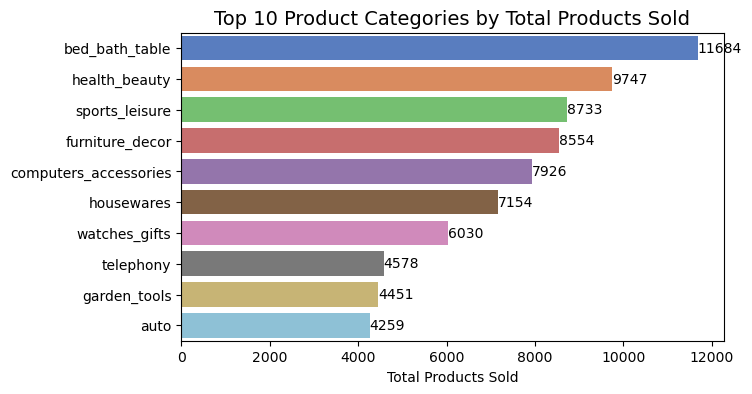

In [88]:
plt.figure(figsize=(7,4))
ax = sns.barplot(y='product_category_name_english',
                 x='total_product',
                 data=top_10_product)

for i in ax.containers:
    ax.bar_label(i,)

# Title and label    
ax.set_title("Top 10 Product Categories by Total Products Sold", fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Total Products Sold', fontsize=10)

Based on the chart above, it can be observed that the most popular product or the best-selling item is bed bath table, with total sales quantity is 11,684 products.

In [77]:
# 2. Which products have the highest total sales?
total_sales_per_product = clean_data.loc[:,['product_category_name_english','product_id','price']]
total_sales_per_product['avg_price'] = total_sales_per_product['price']

total_sales_per_product = total_sales_per_product.groupby(['product_category_name_english']).agg({'product_id':'count','avg_price':'mean','price':'sum'}).sort_values(by='price', ascending=False).head(10)
total_sales_per_product = total_sales_per_product.rename(columns = {'product_id':'total_product','price' : 'total_sales'})

total_sales_per_product['total_sales']=round((total_sales_per_product['total_sales']/1000000),3)
total_sales_per_product = total_sales_per_product.reset_index()
total_sales_per_product


,product_category_name_english,total_product,avg_price,total_sales
0,health_beauty,9747,129.987954,1.267
1,watches_gifts,6030,200.224776,1.207
2,bed_bath_table,11684,92.595886,1.082
3,sports_leisure,8733,113.309708,0.990
4,computers_accessories,7926,116.386928,0.922
5,furniture_decor,8554,87.254681,0.746
6,housewares,7154,90.331698,0.646
7,cool_stuff,3885,161.721640,0.628
8,auto,4259,139.675332,0.595
9,garden_tools,4451,110.158791,0.490


Text(0.5, 0, 'Total Sales per Products (in R$ Million)')

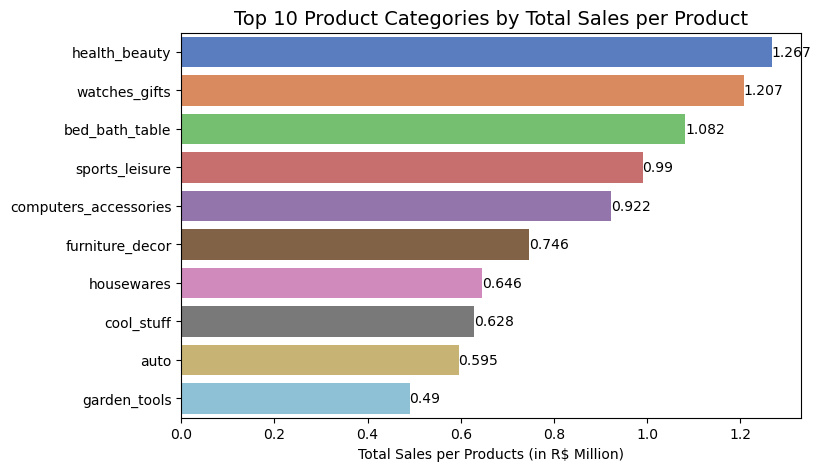

In [78]:
plt.figure(figsize=(8,5))
ax = sns.barplot(y='product_category_name_english',
                 x='total_sales',
                 data=total_sales_per_product)

for i in ax.containers:
    ax.bar_label(i,)

# Title and label    
ax.set_title("Top 10 Product Categories by Total Sales per Product", fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Total Sales per Products (in R$ Million)', fontsize=10)

Based on the chart above, it can be determined that the product with the highest total sales is health beauty, with a total sales is 1.267 in R$ million.

In [45]:
# 3. What types of payment are most frequently used by customers?
customer_payment_type = clean_data.groupby(['payment_type']).agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).head()
customer_payment_type = customer_payment_type.rename(columns = {'order_id' : 'total_orders'})
customer_payment_type = customer_payment_type.reset_index()
customer_payment_type


,payment_type,total_orders
0,credit_card,83528
1,ticket,22015
2,voucher,6022
3,debit_card,1622


Text(0.5, 0, 'Payment Type')

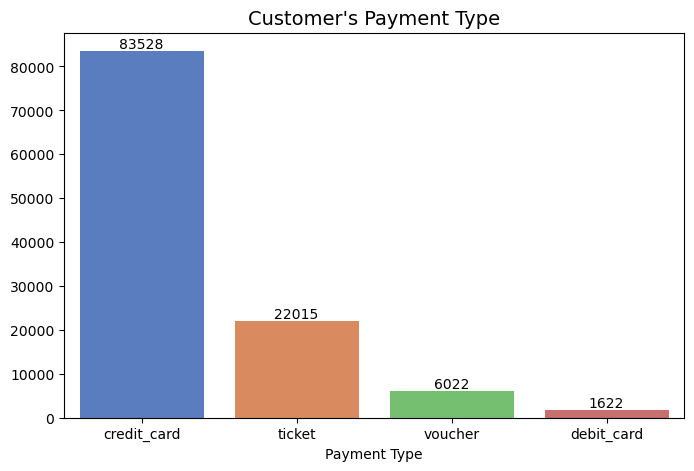

In [46]:
plt.figure(figsize=(8,5))
ax = sns.barplot(y='total_orders',
                 x='payment_type',
                 data=customer_payment_type)

for i in ax.containers:
    ax.bar_label(i,)

# Title and label    
ax.set_title("Customer's Payment Type", fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Payment Type', fontsize=10)

Based on the chart above, it can be determined that the frequently used payment type is credit card, with number of transactions is 83,528.

In [53]:
# Create an order_payment dataset that facilitates calculations using time-based data
order_payment = clean_data.loc[:,['order_id', 'order_status', 'order_purchase_timestamp', 'payment_value']]
order_payment['order_purchase_date'] = order_payment['order_purchase_timestamp'].apply(lambda x: x[0:10])
order_payment['order_purchase_date'] = pd.to_datetime(order_payment['order_purchase_date'])
order_payment

,order_id,order_status,order_purchase_timestamp,payment_value,order_purchase_date
0,e17e4f88e31525f7deef66779844ddce,delivered,2018-04-24 16:16:53,18.30,2018-04-24
1,b18cb761efbe70da4838435a349abd07,delivered,2018-07-04 18:39:28,289.45,2018-07-04
2,a7708ffa8966514c098d15e1abfa6417,delivered,2018-04-23 19:03:35,57.75,2018-04-23
3,a7708ffa8966514c098d15e1abfa6417,delivered,2018-04-23 19:03:35,57.75,2018-04-23
4,206d1a13596872a713dba14504fdf699,delivered,2018-07-29 20:50:22,286.45,2018-07-29
...,...,...,...,...,...
118140,df832acdcfc236969ab361d4597e6e0a,delivered,2018-07-19 01:00:07,47.14,2018-07-19
118141,440fd902b617080eeb9463a65ffae07a,delivered,2018-01-18 00:19:41,266.18,2018-01-18
118142,9edafa4c6dbc4a9dd05637c84bf96605,delivered,2017-11-27 23:57:41,288.29,2017-11-27
118143,37a7476e58da10721b5e55ba4be6807d,delivered,2017-12-06 20:22:29,129.16,2017-12-06


In [ ]:
# 4. How is the trend of orders placed each month of the year?
number_of_orders = len(order_payment['order_id'].unique())

print('The total number of orders placed on Olist is {}'.format(number_of_orders))

In [60]:
orders_trend = order_payment.loc[:,['order_id', 'order_purchase_date']]

# Set the order_purchase_date as the index of the dataframe
orders_trend = orders_trend.set_index('order_purchase_date')

# Group the order_puchase_date by quarter and find the count of each quarter
monthly_order_trend = orders_trend.resample('M').agg({'order_id': 'count'})

# Show result
monthly_order_trend_table = monthly_order_trend.rename(columns = {'order_id' : 'total_orders'}).reset_index()
monthly_order_trend_table

,order_purchase_date,total_orders
0,2016-10-31,328
1,2016-11-30,0
2,2016-12-31,1
3,2017-01-31,956
4,2017-02-28,1890
5,2017-03-31,3010
6,2017-04-30,2622
7,2017-05-31,4173
8,2017-06-30,3639
9,2017-07-31,4666


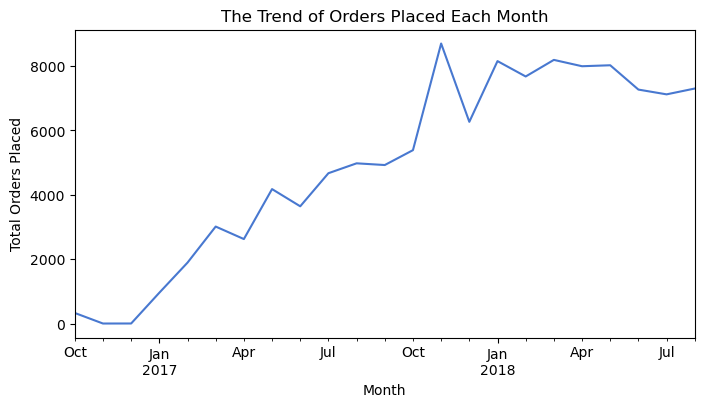

In [61]:
fig,ax = plt.subplots(figsize = (8,4))

monthly_order_trend.plot(ax = ax, legend = False)

plt.xlabel('Month')
plt.ylabel('Total Orders Placed')
plt.title("The Trend of Orders Placed Each Month")
plt.show()

Based on the trend chart, it can be observed that the orders for each month shows an increasing trend, reaching its peak in November of 2017 with 8692 product sales. However, in December of 2017, the total orders experiences a significant decline with 6261 product sales, and increase in January of 2018.

In [54]:
# 5. How much is the total revenue of Olist during that period?
total_revenue = order_payment['payment_value'].sum()
total_revenue_millions = round(total_revenue/1000000,4)

print('The total revenue generated by Olist is R${}M'.format(total_revenue_millions))

The total revenue generated by Olist is R$19.4202M


In [76]:
# 6. How is the trend of revenue for each quarter and each month of the year?
revenue_trend = order_payment.loc[:,['order_purchase_date', 'payment_value']]
revenue_trend = revenue_trend.rename(columns ={'payment_value':'revenue'})

# Set the order_purchase_date as the index of the dataframe
revenue_trend = revenue_trend.set_index('order_purchase_date')


In [77]:
# Group the order_puchase_date by quarter and find the sum of payment value for each quarter
quarter_total_revenue = revenue_trend.resample('Q', closed='right').agg({'revenue': 'sum'})
quarter_total_revenue = round(quarter_total_revenue/1000000,4) #in millions

# Show result
quarter_total_revenue_table = quarter_total_revenue.reset_index()
quarter_total_revenue_table

,order_purchase_date,revenue
0,2016-12-31,0.0608
1,2017-03-31,0.9804
2,2017-06-30,1.7074
3,2017-09-30,2.4886
4,2017-12-31,3.4941
5,2018-03-31,4.0069
6,2018-06-30,4.1932
7,2018-09-30,2.4889


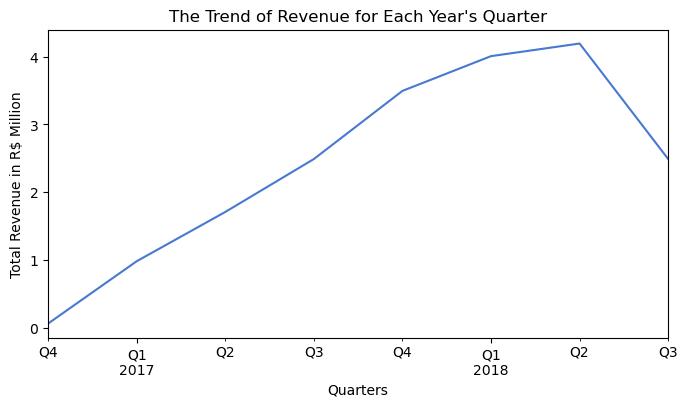

In [78]:
fig,ax = plt.subplots(figsize = (8,4))

quarter_total_revenue.plot(ax = ax, legend = False)

plt.title("The Trend of Revenue for Each Year's Quarter")
plt.xlabel('Quarters')
plt.ylabel('Total Revenue in R$ Million')
plt.show()

Based on the trend chart, it can be observed that the revenue for each quarter shows an increasing trend, reaching its peak in the second quarter of 2018 with 4.1932 R Million. However, in the third quarter of 2018, the total revenue experiences a significant decline with 2.4889 R Million.

In [79]:
# Group the order_puchase_date by month and find the sum of payment value for each month
monthly_total_revenue = revenue_trend.resample('M', closed='right').agg({'revenue': 'sum'})
monthly_total_revenue = round(monthly_total_revenue/1000000,4) #in millions

# Show result
monthly_total_revenue_table = monthly_total_revenue.reset_index()
monthly_total_revenue_table

,order_purchase_date,revenue
0,2016-10-31,0.0607
1,2016-11-30,0.0000
2,2016-12-31,0.0000
3,2017-01-31,0.1748
4,2017-02-28,0.3142
5,2017-03-31,0.4913
6,2017-04-30,0.4412
7,2017-05-31,0.6871
8,2017-06-30,0.5791
9,2017-07-31,0.7096


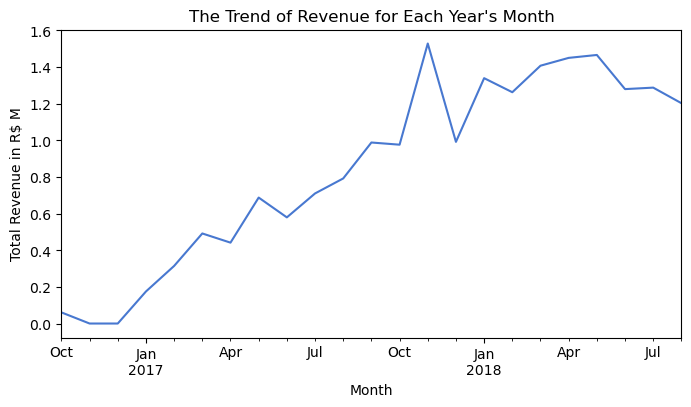

In [80]:
fig,ax = plt.subplots(figsize = (8,4))

monthly_total_revenue.plot(ax = ax, legend = False)

plt.title("The Trend of Revenue for Each Year's Month")
plt.xlabel('Month')
plt.ylabel('Total Revenue in R$ M')
plt.show()

Based on the trend chart, it can be observed that the revenue for each month shows an increasing trend, reaching its peak in November of 2017 with 1.5275 R Million. However, in December of 2017, the total revenue experiences a significant decline with 0.9910 R Million and increase in January of 2018.